In the actual learning process, the model does NOT magically know the best slope and intercept.
There are two different ways linear regression is solved. 🔹 Method 1: Closed-form solution (what we coded) This is what we just wrote: m = formula
c = formula What’s happening here?
 Math directly finds m and c It guarantees minimum error Uses calculus behind the scenes This method already minimizes residuals, but:
👉 you don’t see the step-by-step learning Used when: Data is small One or few features Mainly for learning math Method 2: Gradient Descent (REAL ML training)
 This is what happens in real ML systems.
 Idea (very simple)
 Start with random m and cMake predictions

 Calculate residual (error)

 Adjust m and c to reduce error

Repeat until error is small
YES — it reduces residuals step by step ✅

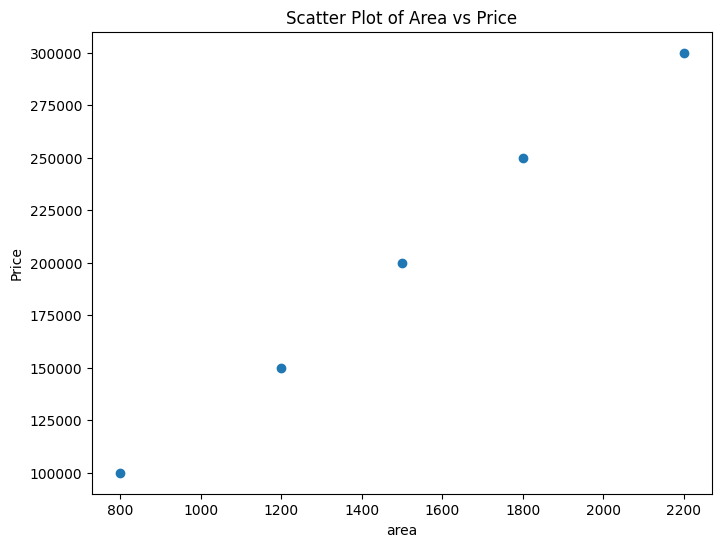

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

data = {
    'price': [100000, 150000, 200000, 250000, 300000],
    'area': [800, 1200, 1500, 1800, 2200]
}
df = pd.DataFrame(data)
plt.figure(figsize=(8,6))

plt.scatter(df.area, df.price)
plt.xlabel('area')
plt.ylabel('Price')
plt.title("Scatter Plot of Area vs Price")
plt.show()

In [ ]:
print(df.area.shape)
print(df[['area']].shape)


(5,)
(5, 1)


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict(pd.DataFrame([[1400]], columns=['area']))

array([185344.82758621])

In [ ]:
d=[100,200,300,400,500]
reg.predict(pd.DataFrame(d,columns=['area']))


array([-5172.4137931 ,  9482.75862069, 24137.93103448, 38793.10344828,
       53448.27586207])

In [ ]:
reg.coef_  ##coefficient value

array([146.55172414])

In [ ]:
reg.intercept_ ##intercept value

np.float64(-19827.58620689658)

In [ ]:
# -----------------------------
# Linear Regression from Scratch
# No pandas, no numpy, no sklearn
# -----------------------------

# Step 1: Data
area = [800, 1200, 1500, 1800, 2200]
price = [100000, 150000, 200000, 250000, 300000]

# Step 2: Mean function
def mean(values):
    return sum(values) / len(values)

# Step 3: Calculate slope (m)
def slope(x, y):
    x_mean = mean(x)
    y_mean = mean(y)

    numerator = 0
    denominator = 0

    for i in range(len(x)):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2

    return numerator / denominator

# Step 4: Calculate intercept (c)
def intercept(x, y, m):
    return mean(y) - m * mean(x)

# Step 5: Train the model
m = slope(area, price)
c = intercept(area, price, m)
print("Slope (m):", m)
print("Intercept (c):", c)
# Step 6: Prediction function
def predict(x, m, c):
    return m * x + c
# Step 7: Make prediction
new_area = 1400
predicted_price = predict(new_area, m, c)
print("Predicted price for area", new_area, "is:", predicted_price)

Slope (m): 146.55172413793105
Intercept (c): -19827.58620689658
Predicted price for area 1400 is: 185344.8275862069


##Gradient Descent

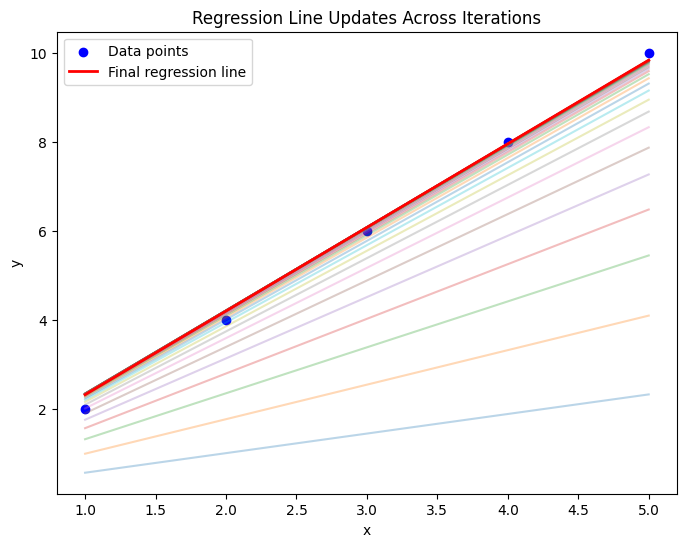

Final slope (w): 1.8797
Final intercept (b): 0.4344
Prediction for x=6: 11.712485492964916
Prediction for x=10: 19.231242344354367
Prediction for x=2.5: 5.133573247999144


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # perfectly linear: y = 2x

# Parameters
w = 0.0   # slope
b = 0.0   # intercept
alpha = 0.01  # learning rate
epochs = 50   # fewer iterations so graph is readable

# Plot setup
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')

# Gradient Descent loop
for i in range(epochs):
    y_pred = w * x + b

    # Gradients
    dw = (-2/len(x)) * np.sum(x * (y - y_pred))
    db = (-2/len(x)) * np.sum(y - y_pred)

    # Update parameters
    w -= alpha * dw
    b -= alpha * db

    # Plot regression line for this iteration
    plt.plot(x, w*x+b, alpha=0.3)  # transparent lines

# Final line highlighted
plt.plot(x, w*x+b, color='red', linewidth=2, label='Final regression line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line Updates Across Iterations')
plt.legend()
plt.show()


# 6. Print final parameters
print(f"Final slope (w): {w:.4f}")
print(f"Final intercept (b): {b:.4f}")

# 7. Prediction function
def predict(x_new):
    return w * x_new + b
# Example predictions
print("Prediction for x=6:", predict(6))
print("Prediction for x=10:", predict(10))
print("Prediction for x=2.5:", predict(2.5))


One hot encoding

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving homeprices.csv to homeprices (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
k=pd.get_dummies(df.town).astype(int)
k

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
m = k.drop('monroe township', axis=1)
m

,robinsville,west windsor
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [ ]:
df=pd.concat([df,m],axis=1)
df

,town,area,price,robinsville,west windsor
0,monroe township,2600,550000,0,0
1,monroe township,3000,565000,0,0
2,monroe township,3200,610000,0,0
3,monroe township,3600,680000,0,0
4,monroe township,4000,725000,0,0
5,west windsor,2600,585000,0,1
6,west windsor,2800,615000,0,1
7,west windsor,3300,650000,0,1
8,west windsor,3600,710000,0,1
9,robinsville,2600,575000,1,0


In [ ]:
X = df[['area','robinsville','west windsor']]   # select exactly 3 columns
y = df['price']

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)


LinearRegression()

In [ ]:
reg.predict([[3400,0,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.6684584])

In [ ]:
reg.score(X,y)

0.9573929037221871

In [ ]:
##Label encoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving homeprices.csv to homeprices (3).csv


In [ ]:
import pandas as pd
df=pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(dfle[['town','area']],dfle.price)

LinearRegression()

In [ ]:
model.predict([[2,3400]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([682889.14751237])

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "town": [
        "monroe township","monroe township","monroe township",
        "monroe township","monroe township",
        "west windsor","west windsor","west windsor","west windsor",
        "robinsville","robinsville","robinsville","robinsville"
    ],
    "area": [2600,3000,3200,3600,4000,2600,2800,3300,3600,2600,2900,3100,3600],
    "price": [550000,565000,610000,680000,725000,585000,615000,650000,710000,
              575000,600000,620000,695000]
})
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
town_encoded = encoder.fit_transform(df[["town"]])
town_encoded_array = town_encoded.toarray()
town_encoded_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
encoded_df = pd.DataFrame(
town_encoded_array,
columns=encoder.get_feature_names_out(["town"])
)
encoded_df

,town_monroe township,town_robinsville,town_west windsor
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [ ]:
final_df = pd.concat([df.drop("town", axis=1), encoded_df], axis=1)
final_df

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,1.0,0.0,0.0
1,3000,565000,1.0,0.0,0.0
2,3200,610000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2600,585000,0.0,0.0,1.0
6,2800,615000,0.0,0.0,1.0
7,3300,650000,0.0,0.0,1.0
8,3600,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# -----------------------------
# 1. Create dataset
# -----------------------------
df = pd.DataFrame({
"hours": [1, 2, 3, 4, 5, 6, 7, 8],
"marks": [35, 40, 50, 60, 65, 70, 75, 85]
})
df

,hours,marks
0,1,35
1,2,40
2,3,50
3,4,60
4,5,65
5,6,70
6,7,75
7,8,85


In [ ]:
X = df[["hours"]] # input feature
y = df["marks"] # target
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.25,
random_state=42
)


# -----------------------------
# 4. Train Linear Regression model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)


# -----------------------------
# 5. Predict on test data
# -----------------------------
y_pred = model.predict(X_test)

In [ ]:
model.predict([[8]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.5])

#Logistic regression

In [ ]:
X_test

,hours
1,2
5,6


In [ ]:
y_test

,marks
1,40
5,70


In [ ]:
##Logistic regression
from google.colab import files
uploaded = files.upload()


Saving insurance_data.csv to insurance_data (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


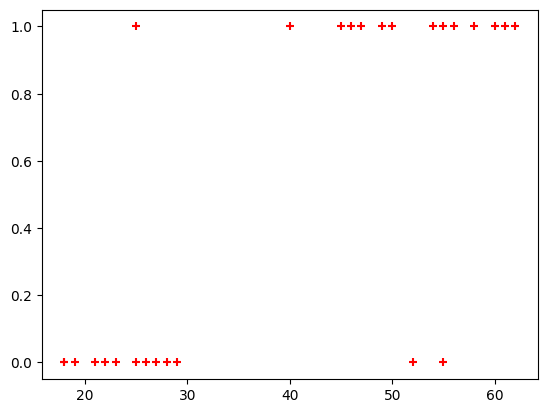

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')


In [ ]:
x=df[['age']]
y=df['bought_insurance']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
X_test

,age
21,26
23,45
17,58


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
predicition=model.predict([[40]])
predicition

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.score(X_test,y_test)

1.0

#Logistic Regression (Multiclass classification)

In [ ]:
##Logistic Regression (Multiclass classification)
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

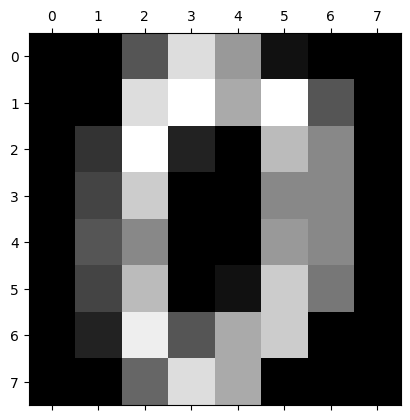

In [ ]:
plt.gray()
plt.matshow(digits.images[0])

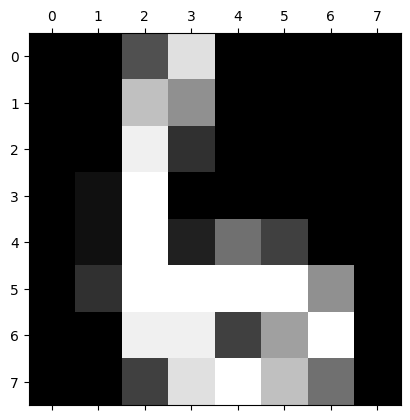

In [ ]:
plt.matshow(digits.images[67])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.predict([digits.data[67]])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([6])

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,train_size=0.9)
X_test


array([[5.2, 4.1, 1.5, 0.1],
       [6. , 3. , 4.8, 1.8],
       [5.7, 2.6, 3.5, 1. ],
       [5. , 3.5, 1.6, 0.6],
       [7.1, 3. , 5.9, 2.1],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 3.2, 5.3, 2.3],
       [5.1, 2.5, 3. , 1.1],
       [6.7, 2.5, 5.8, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [5.3, 3.7, 1.5, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [4.9, 2.5, 4.5, 1.7],
       [4.3, 3. , 1.1, 0.1]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.predict([iris.data[67]])

array([1])

In [ ]:
model.score(X_train,y_train)

0.9851851851851852

#Decision Trees

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salaries.csv to salaries (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv('salaries.csv')
df


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
inputs = df.drop("salary_more_then_100k", axis=1)
target = df["salary_more_then_100k"]
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()


In [ ]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs_n=inputs.drop(['company','job','degree'],axis=1)

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [ ]:
model.predict([[2,2,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
input=df.drop('Survived',axis=1)
target=df['Survived']
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
input['Sex_n']=le.fit_transform(input['Sex'])
input

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
inputs_n = input.drop(
    ['PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'],
    axis=1
)
inputs_n


,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs_n,target)


DecisionTreeClassifier()

In [ ]:
model.predict([[1,38.0,71.2833,0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.score(inputs_n,target)

#KNN

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
iris = load_iris()

df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = df.drop('target', axis=1)
y = df['target']


In [ ]:

df['target'] = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean',
    weights='distance'
)

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', weights='distance')

In [ ]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Support Vector Machine

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##SVM

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


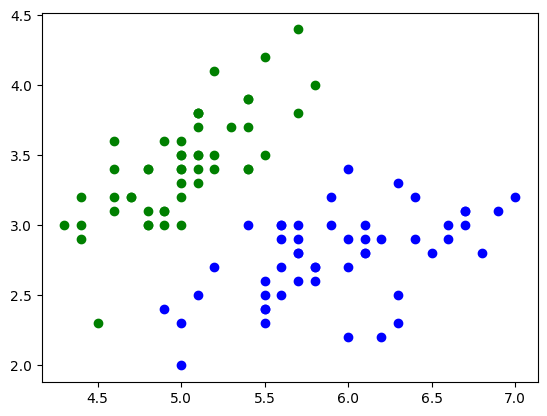

In [ ]:
from matplotlib import pyplot as plt
df0=df[df.target==0]
df1=df[df.target==1]
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model=SVC()


In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
model.predict([[4.6,3.1,	1.5	,0.2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

##SVM DIGITS

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target'] = digits.target
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

In [ ]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')


In [ ]:
rbf_model.fit(X_train, y_train)

SVC()

In [ ]:
rbf_model.score(X_test,y_test)

0.9925925925925926

Using Linear kernel

In [ ]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
linear_model.score(X_test,y_test)

0.9796296296296296

##Naive Bayes

In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic (2).csv to titanic (2).csv


In [4]:
import pandas as pd
df=pd.read_csv('titanic (2).csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [6]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [7]:
target=df.Survived

In [8]:
inputs=df.drop('Survived',axis='columns')

Encoding

In [11]:
dummies = pd.get_dummies(inputs.Sex, dtype=int)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [12]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


Chceking the null values

In [13]:
inputs.columns[inputs.isna().any()]


Index(['Age'], dtype='object')

removing null values

In [31]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [32]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [35]:
model.fit(X_train,y_train)

GaussianNB()

In [36]:
model.score(X_test,y_test)

0.7910447761194029